In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')

In [5]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.agg('count')

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [8]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df1.head(15)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13246, 5)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2.groupby('bhk')['bhk'].agg('count')

bhk
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [16]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [17]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

##### Elimenating the range value inn total_sqft column

In [19]:
df2[df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [20]:
df2[~df2['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [21]:
def cnvt_area_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(cnvt_area_sqft)

In [23]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [24]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df4.location.unique())

1304

In [27]:
df4.location = df4.location.apply(lambda x: x.strip())
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
location_stat = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stat[location_stat<10])                # this type of function can be applied as location_stat is a series and not a list

1039

In [30]:
location_10 = location_stat[location_stat<10]
location_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [31]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_10 else x)
df4.groupby('location')['location'].agg('count').sort_values()

location
Kalkere                  10
Sector 1 HSR Layout      10
BTM 1st Stage            10
Basapura                 10
Gunjur Palya             10
                       ... 
Kanakpura Road          266
Electronic City         304
Sarjapur  Road          392
Whitefield              535
other                  2751
Name: location, Length: 255, dtype: int64

In [32]:
def remove_ppf_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [33]:
df5 = df4.copy()
df5 = remove_ppf_outliners(df5)
df5.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946
5,1st Block Jayanagar,8 Bedroom,700.0,4.0,104.0,8,14857.142857
6,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
8,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
9,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163


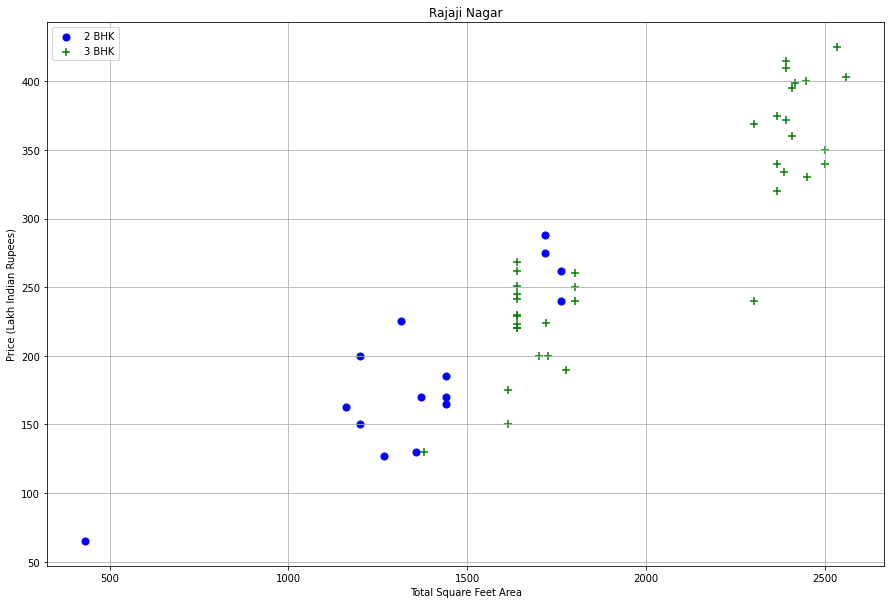

In [34]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.grid()
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")


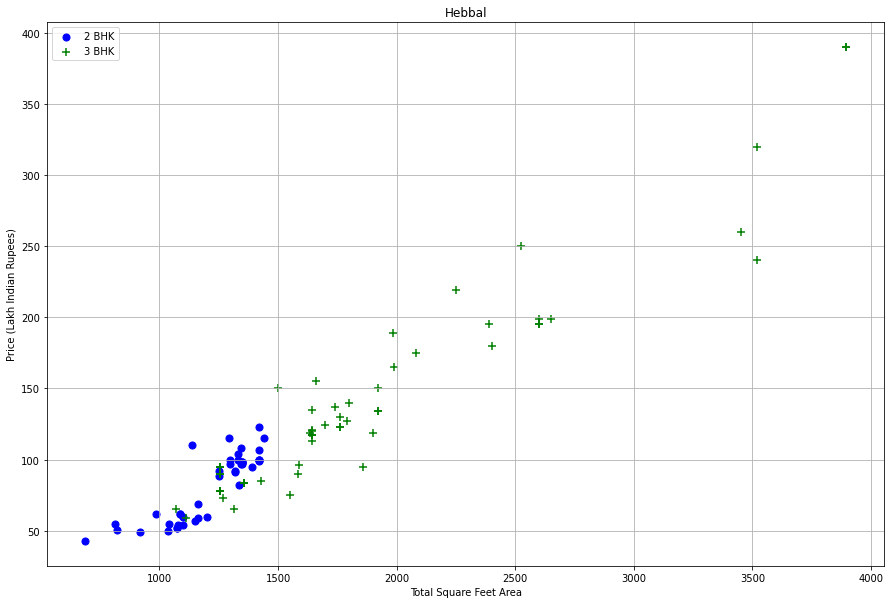

In [35]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.grid()
    plt.legend()
    
plot_scatter_chart(df5,"Hebbal")


#### WE should remove the data points which suggest that in the same location if we have 2 bhk and 3 bhk homes and the rate of 3bhk is lower than that of 2bhk then we should remove that 3 bhk home
This can be done by the use of mean price of 3 bhk bedrooms 
and storing the data in a dictionary

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5 :
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df5)
df8.shape


(8039, 7)

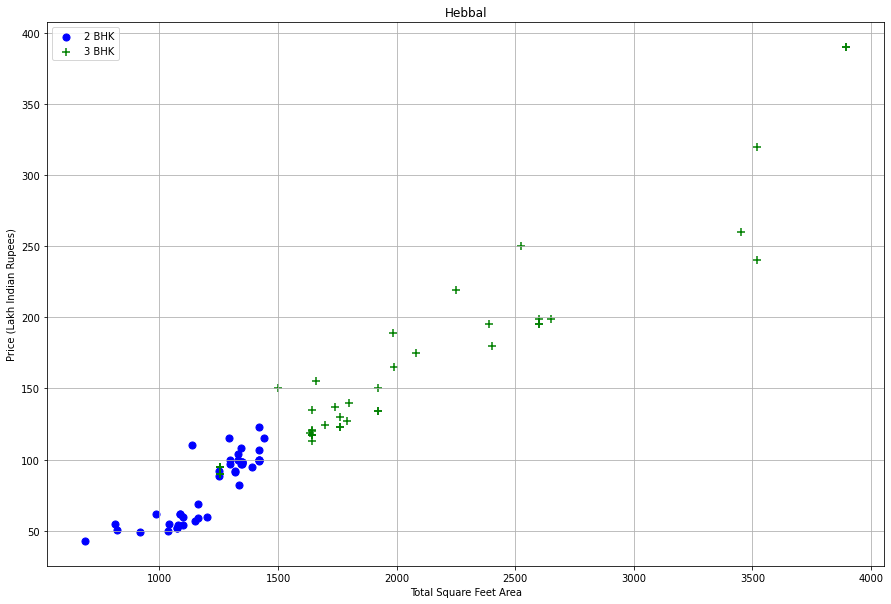

In [37]:
plot_scatter_chart(df8,"Hebbal")

#### After Comparing the Graph from df5 aand df8, we can see the difference in the 1000 and 1500 region and see the reduction in the number of points

Text(0, 0.5, 'Count')

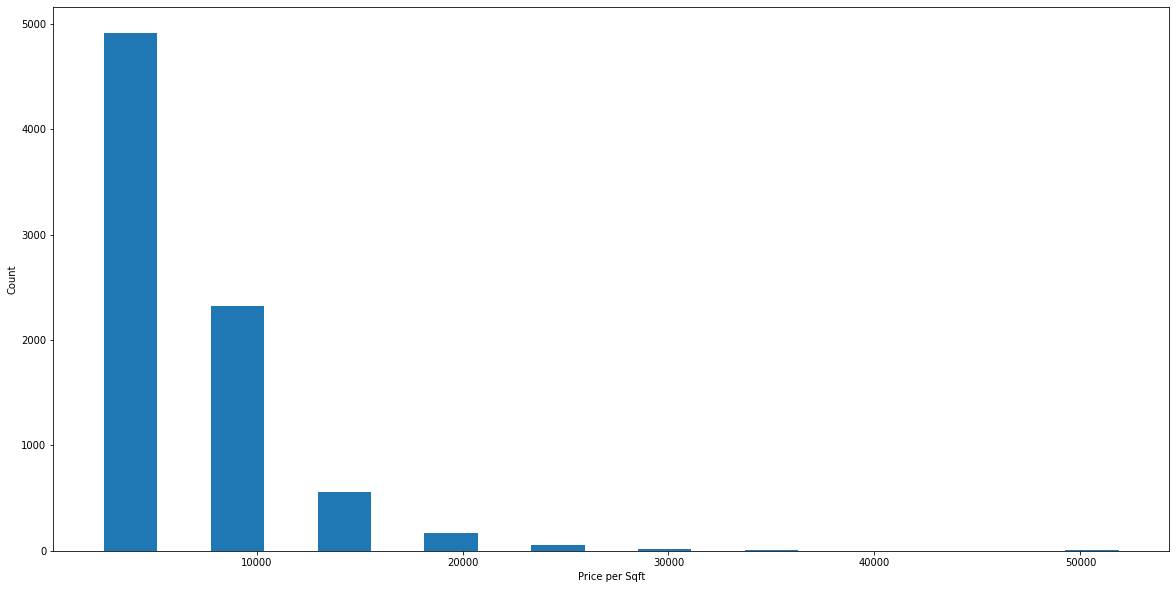

In [38]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.5)
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

In [39]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7., 14.,  9., 10., 12., 27.,
       16., 15., 13., 18.])

In [40]:
df8[df8.bath>=10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
649,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5528,Munnekollal,10 Bedroom,7200.0,10.0,200.0,10,2777.777778
5721,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
6241,Rajaji Nagar,8 Bedroom,1200.0,10.0,180.0,8,15000.000000
8892,other,9 Bedroom,900.0,10.0,170.0,9,18888.888889
9022,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
9027,other,10 Bedroom,750.0,10.0,90.0,10,12000.000000
9040,other,10 Bedroom,1660.0,10.0,475.0,10,28614.457831
9082,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9356,other,19 BHK,2000.0,16.0,490.0,19,24500.000000


In [41]:
df8[df8.bath > df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
649,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1656,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1792,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5680,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7320,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9082,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
10322,other,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
11328,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [42]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7941, 7)

In [43]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.shape

(7941, 5)

In [44]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b6212af10>,
      dtype=object)

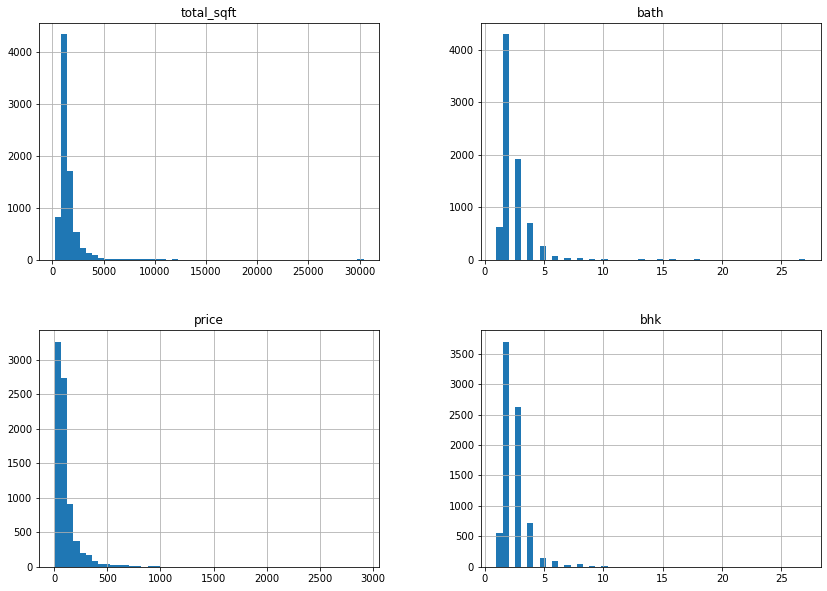

In [45]:
df10.hist(bins=50, figsize=(14,10))

converting location's text data into numbers

In [46]:
dummies = pd.get_dummies(df10.location)

In [47]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [48]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12 = df11.drop('location', axis='columns') 
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12.shape

(7941, 258)

In [51]:
x = df12.drop(['price'],axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y = df12.price.to_numpy()
y

array([428., 194., 125., ...,  26., 325., 400.])

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 10)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7125771893128354

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print(np.mean(cross_val_score(LinearRegression(), x, y, cv=cv)))

0.6931759937090508


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'SVM':{
            'model':SVR(),
            'params' :{
                'kernel': ['rbf']
            }
        },

        'Random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators' : [100,500,1000],
                'random_state' : [0]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print(algo_name)
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

linear_regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

lasso
SVM
Random_forest
decision_tree


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

,model,best_score,best_params
0,linear_regression,0.693176,{'normalize': True}
1,lasso,0.588637,"{'alpha': 1, 'selection': 'random'}"
2,SVM,0.376239,{'kernel': 'rbf'}
3,Random_forest,0.533161,"{'n_estimators': 100, 'random_state': 0}"
4,decision_tree,0.317721,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [60]:
for i in df12.columns:
    print(i)

total_sqft
bath
price
bhk
1st Block Jayanagar
1st Block Koramangala
1st Phase JP Nagar
2nd Phase Judicial Layout
2nd Stage Nagarbhavi
5th Block Hbr Layout
5th Phase JP Nagar
6th Phase JP Nagar
7th Phase JP Nagar
8th Phase JP Nagar
9th Phase JP Nagar
AECS Layout
Abbigere
Akshaya Nagar
Ambalipura
Ambedkar Nagar
Amruthahalli
Anandapura
Ananth Nagar
Anekal
Anjanapura
Ardendale
Arekere
Attibele
BEML Layout
BTM 1st Stage
BTM 2nd Stage
BTM Layout
Babusapalaya
Badavala Nagar
Balagere
Banashankari
Banashankari Stage II
Banashankari Stage III
Banashankari Stage V
Banashankari Stage VI
Banaswadi
Banjara Layout
Bannerghatta
Bannerghatta Road
Basapura
Basavangudi
Basaveshwara Nagar
Battarahalli
Begur
Begur Road
Bellandur
Benson Town
Bharathi Nagar
Bhoganhalli
Billekahalli
Binny Pete
Bisuvanahalli
Bommanahalli
Bommasandra
Bommasandra Industrial Area
Bommenahalli
Brookefield
Budigere
CV Raman Nagar
Chamrajpet
Chandapura
Channasandra
Chikka Tirupathi
Chikkabanavar
Chikkalasandra
Choodasandra
Cooke Tow

In [61]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return model.predict([z])[0]

In [62]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


107.81051320623824

In [63]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


91.752

In [64]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))